In [1]:
# 1. Import the Necessary Dependencies
import re #re module for using regular expressions
import numpy as np #perform a wide variety of mathematical operations on arrays.
import pandas as pd #library used for working with data sets
# plotting
import seaborn as sns  #Python library used for visualizing the explorative statistical plots of data
from wordcloud import WordCloud #to know the frequency of a word in textual content using visualization
import matplotlib.pyplot as plt # library in Python used for creating high-quality visualizations and graphs
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn - scikit-learn is a free and open-source machine learning library for the Python programming language. 
from sklearn.svm import LinearSVC #Linear Support Vector Classification
from sklearn.naive_bayes import BernoulliNB #Naive Bayes classifier for multivariate Bernoulli models
from sklearn.linear_model import LogisticRegression #Logistic regression is a data analysis technique that uses mathematics to find the relationships between two data factors.
from sklearn.model_selection import train_test_split #Python splits arrays or matrices into random subsets for train and test data, respectively.
from sklearn.feature_extraction.text import TfidfVectorizer #Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.metrics import confusion_matrix, classification_report #Compute confusion matrix to evaluate the accuracy of a classification.

In [2]:
#2. Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(r"F:\DataScience_2023_Guvi\Twitter_Sentiment_Analysis_final_Project\twitter_project_data.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5) # used to get a subset of random rows or columns from pandas dataframe.


,target,ids,date,flag,user,text
504934,0,2188261616,Mon Jun 15 21:34:44 PDT 2009,NO_QUERY,linkinbabe112,Myspace kinda sh!t what the hell is happening...
995771,4,1835771637,Mon May 18 06:43:03 PDT 2009,NO_QUERY,iamgaberosales,"in the end, i know i'm too messed up for peopl..."
852243,4,1572914334,Mon Apr 20 23:00:35 PDT 2009,NO_QUERY,serge010,@aplusk Have you read/ seen The Pillowman? the...
515134,0,2190778448,Tue Jun 16 03:42:06 PDT 2009,NO_QUERY,clthorburnx,OMG.i.miss.camp SINGING career on its way lol...
681345,0,2249715641,Fri Jun 19 22:52:27 PDT 2009,NO_QUERY,StinaFritsch,People out of high school who talk down on tho...


In [3]:
#3.Exploratory Data Analysis
df.head()  #The head() method returns a specified number of rows, string from the top. the first 5 rows if a number is not specified. 

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [55]:
print('length of data is', len(df))

length of data is 1048576


In [20]:
df. shape #shape of the data

(1048576, 6)

In [56]:
df.info() #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  int64 
 1   ids     1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [57]:
np.sum(df.isnull().any(axis=1)) #checking for the not null values

0

In [58]:
print('Number of columns in the dataset is:  ', len(df.columns))
print('NUmber of rows in the dataset is:  ', len(df))

Number of columns in the dataset is:   6
NUmber of rows in the dataset is:   1048576


In [24]:
#Check unique target values
df['target'].unique() 

array([0, 4], dtype=int64)

In [59]:
#Check the number of target values
df['target'].nunique()

2

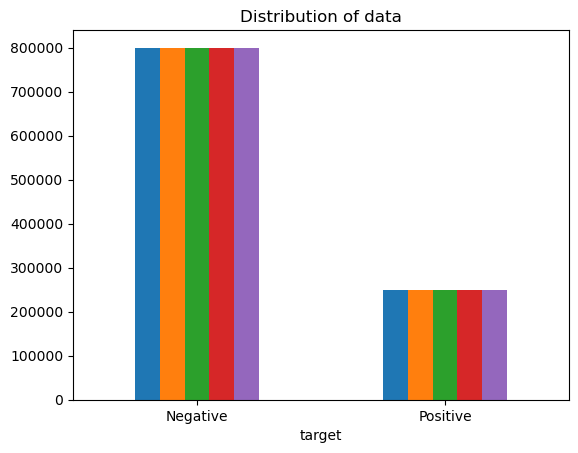

In [60]:
#Data Visualization of Target Variables
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

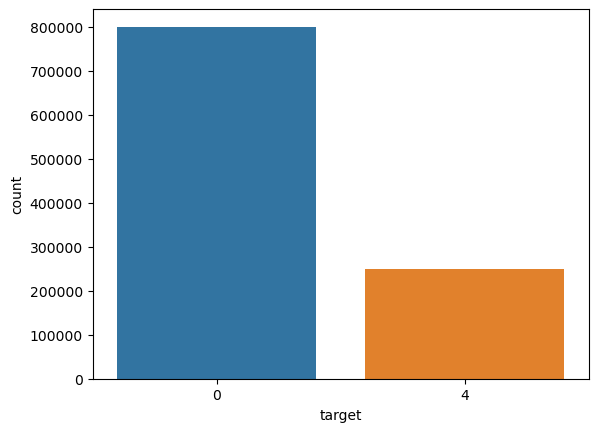

In [61]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [62]:
#Data Preprocessing
#Selecting the text and Target column for our further analysis
data=df[['text','target']]
print(data)

                                                      text  target
0        @switchfoot http://twitpic.com/2y1zl - Awww, t...       0
1        is upset that he can't update his Facebook by ...       0
2        @Kenichan I dived many times for the ball. Man...       0
3          my whole body feels itchy and like its on fire        0
4        @nationwideclass no, it's not behaving at all....       0
...                                                    ...     ...
1048571           My GrandMa is making Dinenr with my Mum        4
1048572  Mid-morning snack time... A bowl of cheese noo...       4
1048573  @ShaDeLa same here  say it like from the Termi...       4
1048574             @DestinyHope92 im great thaanks  wbuu?       4
1048575               cant wait til her date this weekend        4

[1048576 rows x 2 columns]


In [63]:
#Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)
data['target'] = data['target'].replace(4,1)
print(data)

                                                      text  target
0        @switchfoot http://twitpic.com/2y1zl - Awww, t...       0
1        is upset that he can't update his Facebook by ...       0
2        @Kenichan I dived many times for the ball. Man...       0
3          my whole body feels itchy and like its on fire        0
4        @nationwideclass no, it's not behaving at all....       0
...                                                    ...     ...
1048571           My GrandMa is making Dinenr with my Mum        1
1048572  Mid-morning snack time... A bowl of cheese noo...       1
1048573  @ShaDeLa same here  say it like from the Termi...       1
1048574             @DestinyHope92 im great thaanks  wbuu?       1
1048575               cant wait til her date this weekend        1

[1048576 rows x 2 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_9488\3337246354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [64]:
#Printing unique values of target variables
data['target'].unique()
print(data)

                                                      text  target
0        @switchfoot http://twitpic.com/2y1zl - Awww, t...       0
1        is upset that he can't update his Facebook by ...       0
2        @Kenichan I dived many times for the ball. Man...       0
3          my whole body feels itchy and like its on fire        0
4        @nationwideclass no, it's not behaving at all....       0
...                                                    ...     ...
1048571           My GrandMa is making Dinenr with my Mum        1
1048572  Mid-morning snack time... A bowl of cheese noo...       1
1048573  @ShaDeLa same here  say it like from the Termi...       1
1048574             @DestinyHope92 im great thaanks  wbuu?       1
1048575               cant wait til her date this weekend        1

[1048576 rows x 2 columns]


In [65]:
#Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
print(data_neg)

                                                     text  target
0       @switchfoot http://twitpic.com/2y1zl - Awww, t...       0
1       is upset that he can't update his Facebook by ...       0
2       @Kenichan I dived many times for the ball. Man...       0
3         my whole body feels itchy and like its on fire        0
4       @nationwideclass no, it's not behaving at all....       0
...                                                   ...     ...
799995  Sick  Spending my day laying in bed listening ...       0
799996                                    Gmail is down?        0
799997                      rest in peace Farrah! So sad        0
799998  @Eric_Urbane Sounds like a rival is flagging y...       0
799999  has to resit exams over summer...  wishes he w...       0

[800000 rows x 2 columns]


In [66]:
#Taking one-fourth of the data so we can run it on our machine easily
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
print(data_neg)

                                                    text  target
0      @switchfoot http://twitpic.com/2y1zl - Awww, t...       0
1      is upset that he can't update his Facebook by ...       0
2      @Kenichan I dived many times for the ball. Man...       0
3        my whole body feels itchy and like its on fire        0
4      @nationwideclass no, it's not behaving at all....       0
...                                                  ...     ...
19995  Not much time off this weekend, work trip to M...       0
19996                          One more day of holidays        0
19997  feeling so down right now .. i hate you DAMN H...       0
19998  geez,i hv to READ the whole book of personalit...       0
19999  I threw my sign at donnie and he bent over to ...       0

[20000 rows x 2 columns]


In [67]:
#Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg])
print(dataset)
#dataset['text'].head()

                                                     text  target
800000       I LOVE @Health4UandPets u guys r the best!!        1
800001  im meeting up with one of my besties tonight! ...       1
800002  @DaRealSunisaKim Thanks for the Twitter add, S...       1
800003  Being sick can be really cheap when it hurts t...       1
800004    @LovesBrooklyn2 he has that effect on everyone        1
...                                                   ...     ...
19995   Not much time off this weekend, work trip to M...       0
19996                           One more day of holidays        0
19997   feeling so down right now .. i hate you DAMN H...       0
19998   geez,i hv to READ the whole book of personalit...       0
19999   I threw my sign at donnie and he bent over to ...       0

[40000 rows x 2 columns]


In [69]:
#Making statement text in lowercase
dataset['text']=dataset['text'].str.lower()
#dataset['text'].tail()
dataset['text'].head()


800000         i love @health4uandpets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @darealsunisakim thanks for the twitter add, s...
800003    being sick can be really cheap when it hurts t...
800004      @lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [70]:
#Cleaning and removing punctuations from the data set
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off this weekend work trip to ma...
19996                            one more day of holidays 
19997    feeling so down right now  i hate you damn hum...
19998    geezi hv to read the whole book of personality...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [71]:
#Cleaning and removing repeating characters from the data set
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off this weekend work trip to ma...
19996                            one more day of holidays 
19997    feeling so down right now  i hate you damn hum...
19998    geezi hv to read the whole book of personality...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [72]:
#Cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off this weekend work trip to ma...
19996                            one more day of holidays 
19997    feeling so down right now  i hate you damn hum...
19998    geezi hv to read the whole book of personality...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [73]:
#Cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off this weekend work trip to ma...
19996                            one more day of holidays 
19997    feeling so down right now  i hate you damn hum...
19998    geezi hv to read the whole book of personality...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [81]:
#Splitting Our Data Into Train and Test Subsets
# Separating the 95% data for training data and 5% for testing data
x=data.text
y=data.target
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.05, random_state =26105111)
print(y_test)

721309     0
486629     0
932768     1
960367     1
740135     0
          ..
507212     0
1025794    1
713896     0
380610     0
546732     0
Name: target, Length: 52429, dtype: int64


In [ ]:
#Transforming the Dataset Using TF-IDF Vectorizer
#TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency.
#This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

In [83]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train)

  (0, 478471)	0.26679064200077574
  (0, 478330)	0.17764930960943723
  (0, 423398)	0.4260169830673703
  (0, 422854)	0.13916321409212776
  (0, 249268)	0.3673865482642422
  (0, 249166)	0.20694183478295053
  (0, 211847)	0.2956044446865323
  (0, 209223)	0.10758514280005005
  (0, 176548)	0.2911999095181541
  (0, 145660)	0.4916303908950688
  (0, 145623)	0.3052121034038802
  (1, 63189)	0.4824813096647028
  (1, 19518)	0.7946007401799795
  (1, 19371)	0.36853961731360985
  (2, 286635)	0.23730817831856477
  (2, 216035)	0.5519577385722436
  (2, 215497)	0.22350005566899542
  (2, 97385)	0.6185539170088746
  (2, 97377)	0.4543855853812632
  (3, 445596)	0.35996559392384647
  (3, 413804)	0.2792550491878866
  (3, 408574)	0.09729538458282996
  (3, 287242)	0.354811563510986
  (3, 286635)	0.20201600190299898
  (3, 270840)	0.4096836091876859
  :	:
  (996146, 360433)	0.18585967111666482
  (996146, 357625)	0.19370122927953481
  (996146, 357572)	0.11567836934367322
  (996146, 324636)	0.25696607437010643
  (99614

In [85]:
#Function for Model Evaluation
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     40097
           1       0.67      0.66      0.66     12332

    accuracy                           0.84     52429
   macro avg       0.78      0.78      0.78     52429
weighted avg       0.84      0.84      0.84     52429



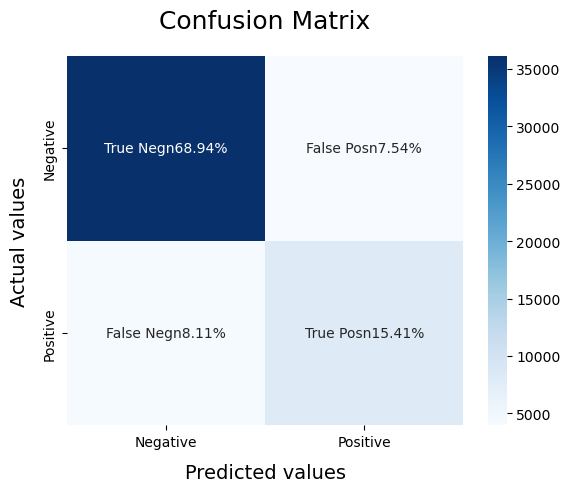

In [86]:
#Model 1 :  Bernoulli Naive Bayes Classifier 
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

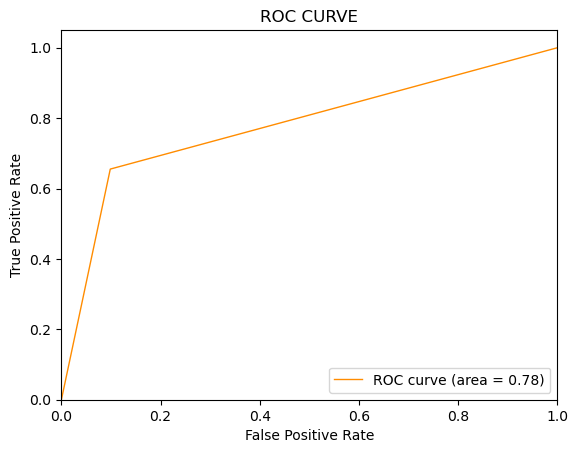

In [87]:
#Plot the ROC-AUC Curve for model-1
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.93      0.91     40097
           1       0.74      0.63      0.68     12332

    accuracy                           0.86     52429
   macro avg       0.81      0.78      0.80     52429
weighted avg       0.86      0.86      0.86     52429



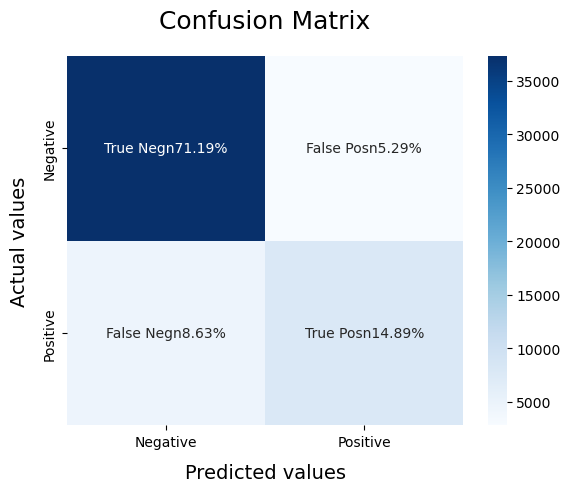

In [88]:
#Model-2: SVM (Support Vector Machine)
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

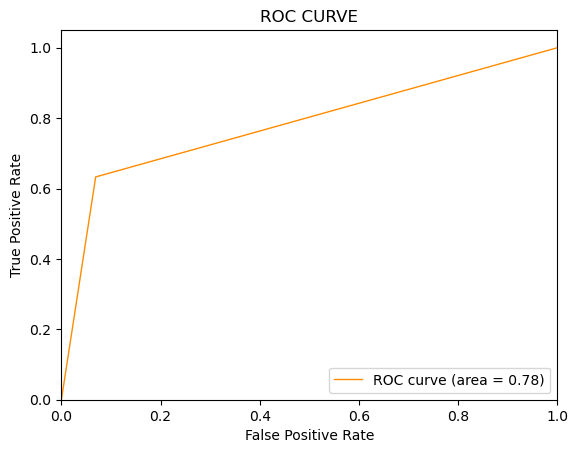

In [89]:
#Plot the ROC-AUC Curve for model-2
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     40097
           1       0.78      0.61      0.69     12332

    accuracy                           0.87     52429
   macro avg       0.83      0.78      0.80     52429
weighted avg       0.86      0.87      0.86     52429



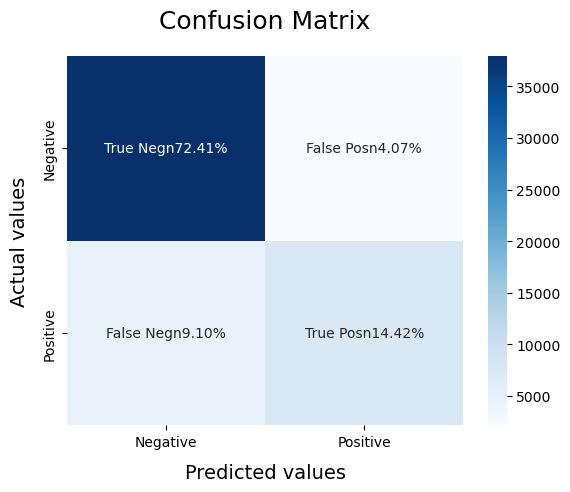

In [90]:
#Model-3 : Logistic Regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

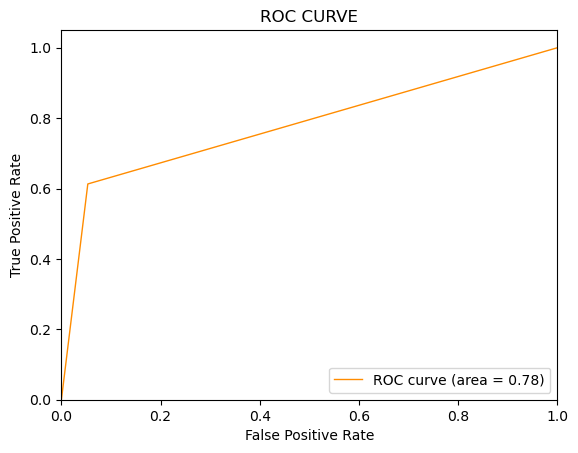

In [91]:
#Plot the ROC-AUC Curve for model-3
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()